I'm going to try to use this document to compile, and save, good looking conductance and gate plots from the set of good looking ferromagnetic dot measurements I have. 

Each plot has a data frame saved as a pickle for faster loading in the future.

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('/Users/nik/Dropbox/Notebooks/thesisrc.py')
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd
import lvdatatools as lvdt

# SCF72

In [2]:
rt_dir = '/Volumes/JUPITER/Data/SCF72/room_temp/'
cold_dir = '/Volumes/JUPITER/Data/SCF72/4K/'

new_dir = '/Volumes/JUPITER/Data/fm_dots/SCF72/'

#### Room Temperature

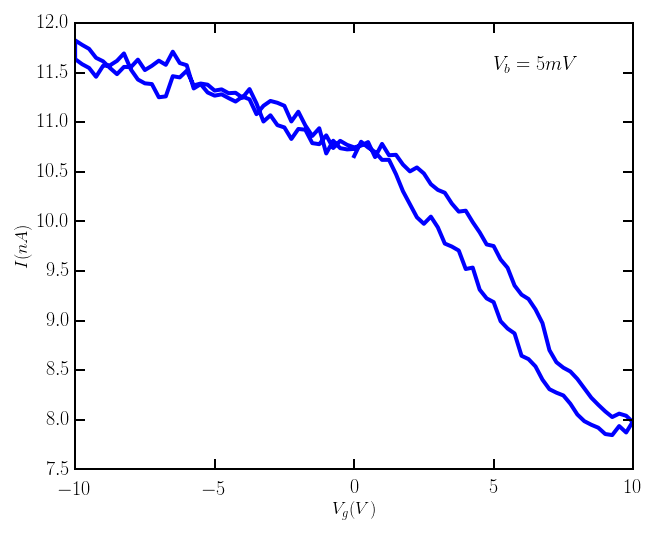

In [3]:
f = os.path.join(rt_dir, 'gate-swp_15-23_13_a.bin')
data = np.fromfile(f, '>d')
data = data.reshape((-1, data[0]))
gate = data[:,1]
current = data [:,2]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(gate, current*1e9)
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$I (nA)$')
ax.text(5.0, 11.5, r'$V_b = 5mV$')

df = pd.DataFrame({'Gate' : gate, 'Iavg' : current})
df.to_pickle(os.path.join(new_dir, 'RT_gate-swp_15-23_13_a.pkl'))

#### 4K DATA

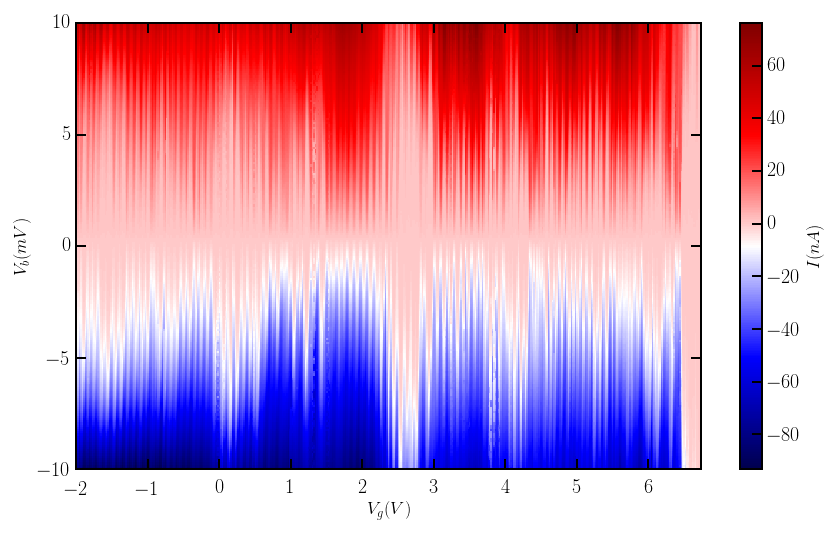

In [19]:
f = os.path.join(cold_dir,'VI-gate_23-21_13_f.bin')

data = np.fromfile(f,'>d')
data = data.reshape((-1, data[0]))
data = data.byteswap().newbyteorder()
data = data.transpose()
df = pd.DataFrame(data[1:, 1:], index=data[1:, 0], columns=data[0, 1:])
df.columns.name = 'gate'
df.index.name = 'bias'
df.index = df.index*1000
df = df.groupby(df.index).mean()

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
limits = [df.columns[0], df.columns[-3],df.index[0],df.index[-1]]
im = ax.imshow(df.iloc[:,:-2]*1e9, extent = limits, 
               cmap = plt.cm.seismic,
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$I (nA)$')

df.to_pickle(os.path.join(new_dir, '4K_VI-gate_23-21_13_f.pkl'))

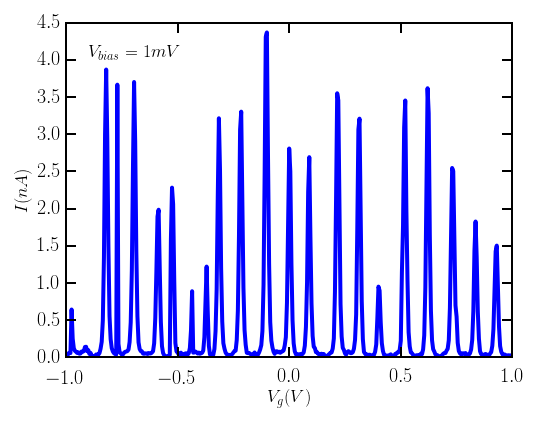

In [23]:
f = os.path.join(cold_dir,'gate-swp_17-29_13_b.bin')
df = lvdt.get_data_2d(f)
df['Iavg'] = df['Iavg']*1e9 + 0.6 # correct offset

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.plot(df.Gate[200:602],df.Iavg[200:602])
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$I (nA)$')
# ax.set_title('gate-swp_17-29_13_b'+'_one')
ax.text(-0.9,4.0,r'$V_{bias}=1mV$', fontsize=18)

df_cut = df.iloc[200:602,:]
df_cut.to_pickle(os.path.join(new_dir, '4K_gate-swp_17-29_13_b1.pkl'))

In [24]:
# get the rest, including TIME SERIES DATA

data = np.fromfile(f,'>d')
data_two = data[4818:]
data_two = data_two.reshape((-1,data_two[0]))
data_two = data_two.byteswap().newbyteorder()
columns = ['Size','Gate','Iavg','Istd','t0','dt']
columns.extend(['I'+str(x) for x in range(int(data_two[0,0]-6))])
df_two = pd.DataFrame(data_two, columns=columns)

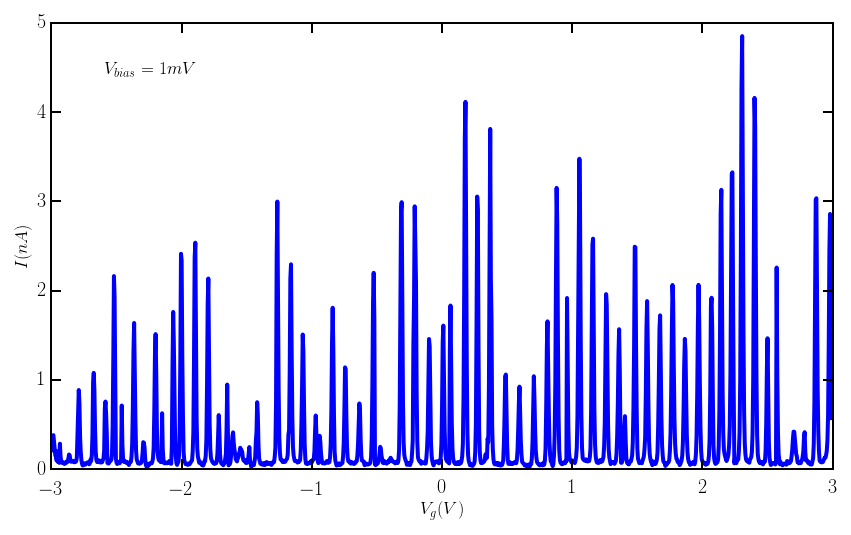

In [26]:
df_two['dir'] = (df_two['Gate']-df_two['Gate'].shift()).fillna(0)
df_plt = df_two[df_two['dir']<0]

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
ax.plot(df_plt['Gate'], df_plt['Iavg']*1e9+0.6)
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$I (nA)$')
ax.text(-2.6,4.4,r'$V_{bias}=1mV$', fontsize=18)

df_two.to_pickle(os.path.join(new_dir, '4K_gate-swp_17-29_13_b1.pk2'))

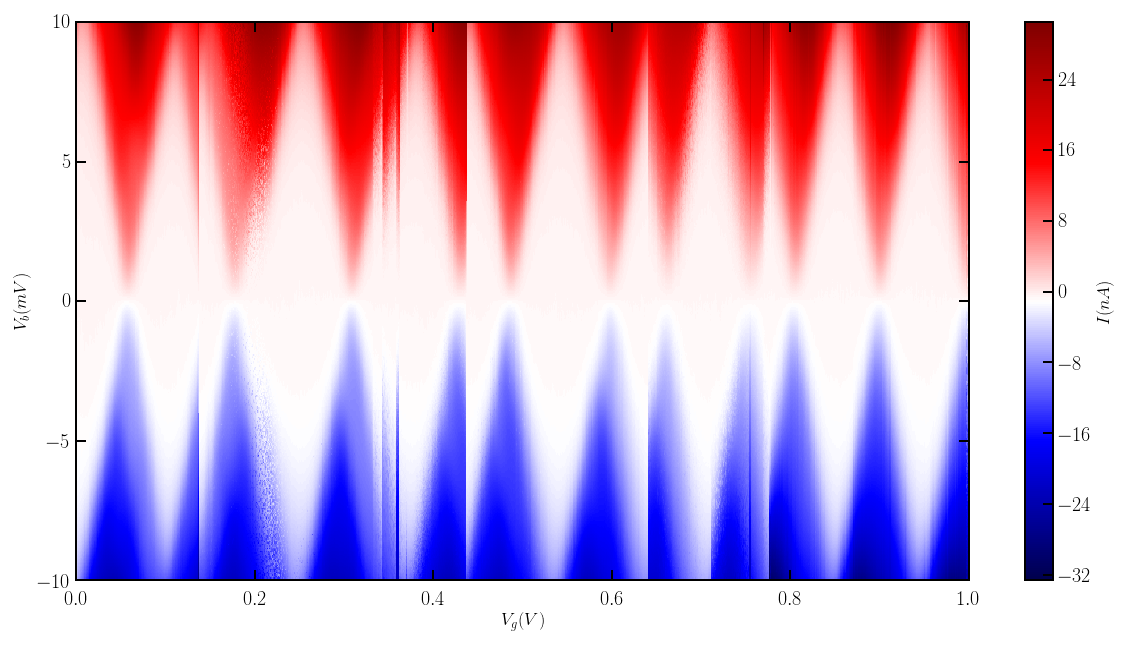

In [28]:
f = os.path.join(cold_dir,'VI-gate_17-19_13_f.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = [df.columns[0], df.columns[-1],df.index[0],df.index[-1]]
im = ax.imshow(df*1e9+0.0, extent = limits, 
               cmap = plt.cm.seismic,
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$I (nA)$')

df.to_pickle(os.path.join(new_dir, '4K_VI-gate_17-19_13_f.pkl'))

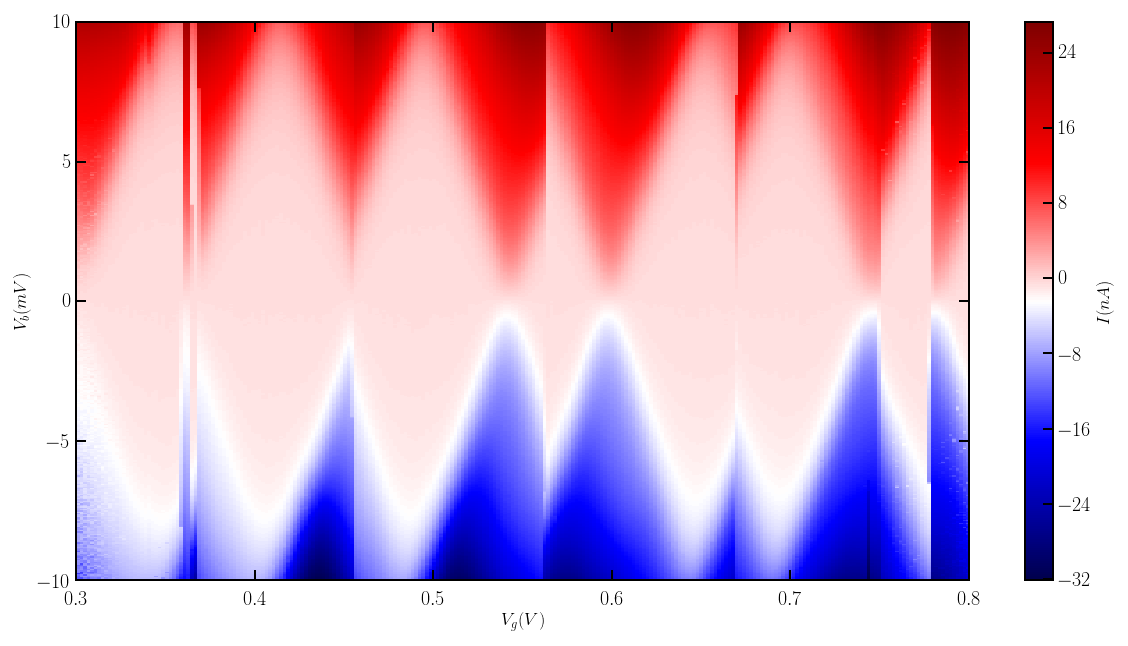

In [30]:
# also contains TIME SERIES DATA

f = os.path.join(cold_dir,'VI-gate_17-19_13_g.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = [df.columns[0], df.columns[-1],df.index[0],df.index[-1]]
im = ax.imshow(df*1e9+0.0, extent = limits, 
               cmap = plt.cm.seismic,
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$I (nA)$')

df.to_pickle(os.path.join(new_dir, '4K_VI-gate_17-19_13_g.pkl'))

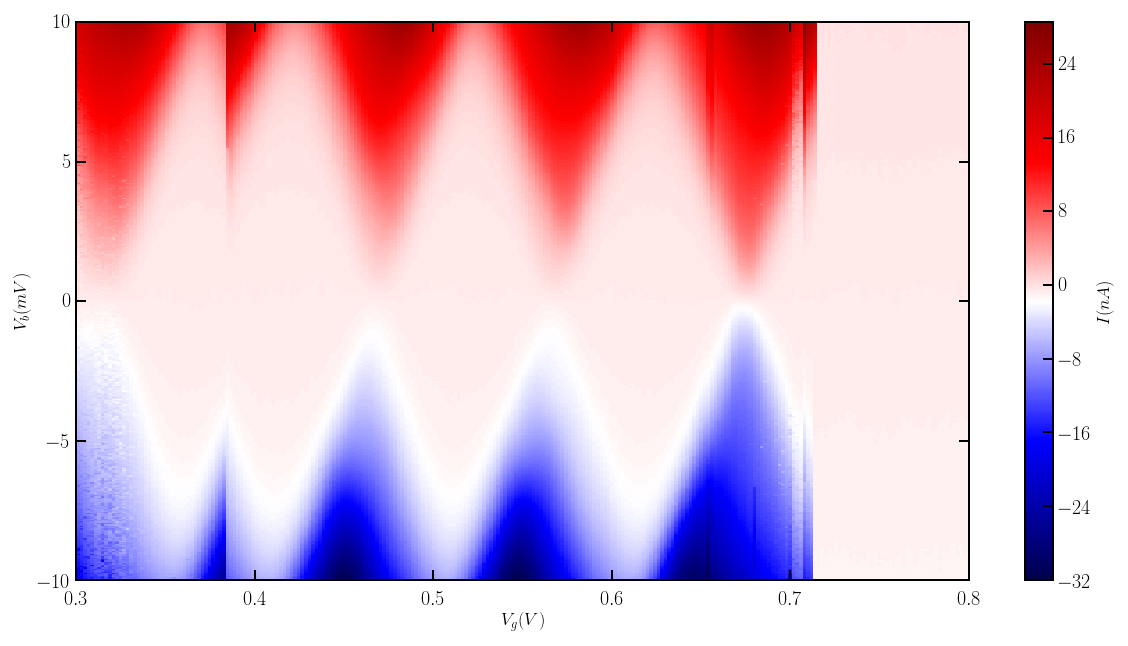

In [32]:
# Same as above two plots but in B field

# also contains TIME SERIES DATA

f = os.path.join(cold_dir,'VI-gate_17-19_13_g_n4T.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = [df.columns[0], df.columns[-1],df.index[0],df.index[-1]]
im = ax.imshow(df*1e9+0.0, extent = limits, 
               cmap = plt.cm.seismic,
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$I (nA)$')

df.to_pickle(os.path.join(new_dir, '4K_VI-gate_17-19_13_g_n4T.pkl'))

In [33]:
def get_bias_gate(header):
    bias = 0.0
    gate = 0.0
    for i,line in enumerate(header):
        if line[0] == 'Bias Output Options':
            bias = float(header[i+5][1])
        if line[0] == 'Gate Output Options':
            gate = float(header[i+5][1])
    return bias, gate

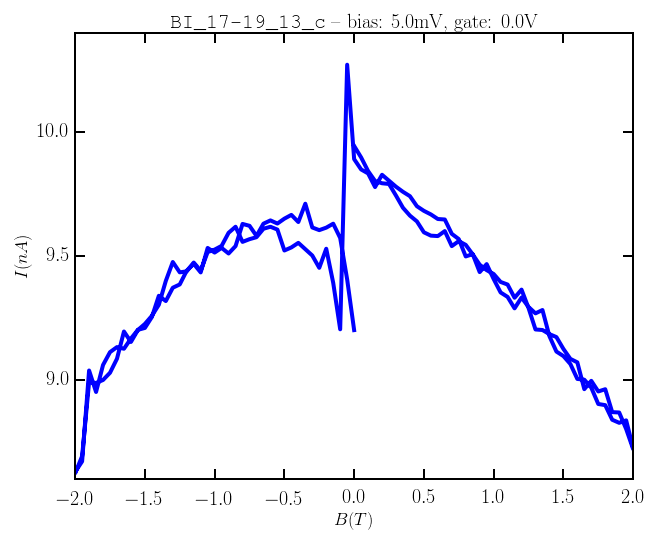

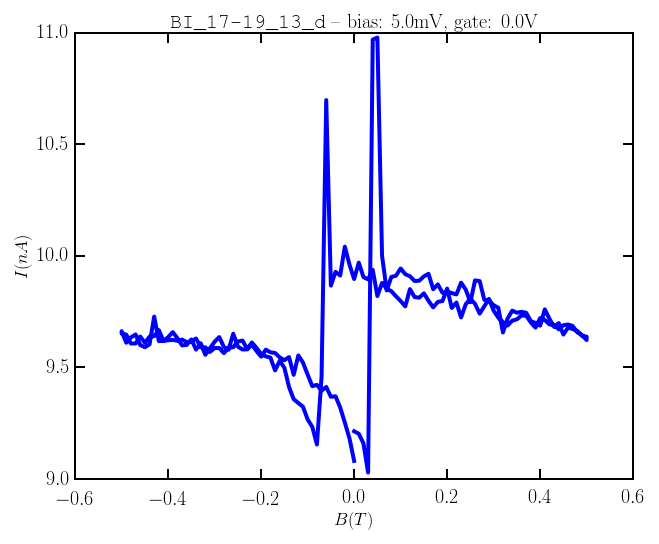

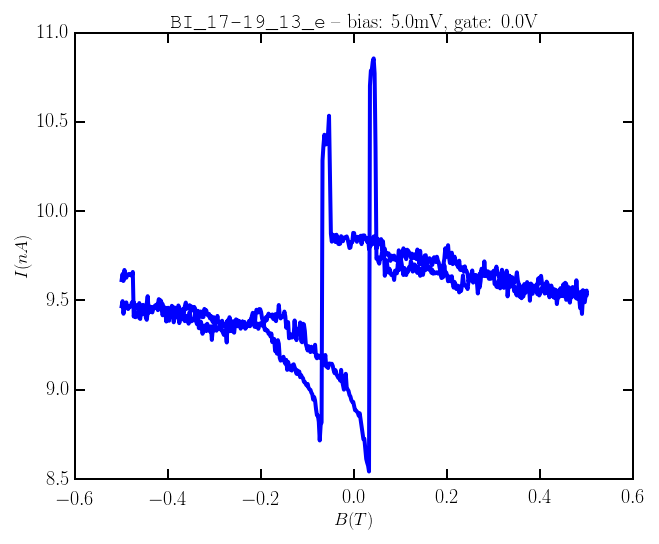

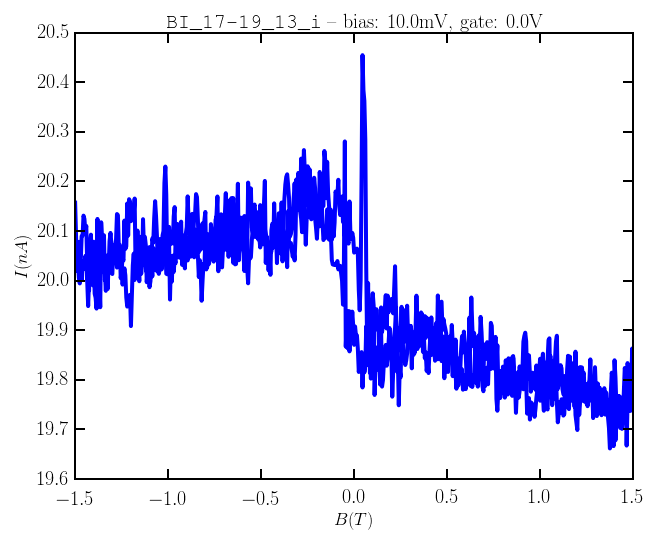

In [51]:
filelist = ['BI_17-19_13_c.bin', 'BI_17-19_13_d.bin', 'BI_17-19_13_e.bin', 'BI_17-19_13_i.bin']
filelist = [os.path.join(cold_dir, f) for f in filelist]

for f in filelist:
    bias, gate = get_bias_gate(lvdt.get_txt(f))
    df = lvdt.get_data_2d(f)
    fshort = f.split('/')[-1][:-4]
    fnew = '4K_'+fshort+'_{0:.0f}mV_{1:.0f}mV.pkl'.format(1000*bias, 1000*gate)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(df['Field'], df['Iavg']*1e9)
    ax.set_xlabel(r'$B (T)$')
    ax.set_ylabel(r'$I (nA)$')
    ax.set_title(r'$\verb|{0}|$ -- bias: {1}mV, gate: {2}V'.format(fshort, bias*1000, gate))
    
    df.to_pickle(os.path.join(new_dir, fnew))

# SCF75

#### 4K Data

In [80]:
cold_dir = '/Volumes/JUPITER/Data/SCF75/4K/'

new_dir = '/Volumes/JUPITER/Data/fm_dots/SCF75/'

In [81]:
def get_bias(header):
    bias = 0.0
    gate = 0.0
    for i,line in enumerate(header):
        if line[0] == 'Bias Output Options':
            bias = float(header[i+5][1])
#         if line[0] == 'Gate Output Options':
#             gate = float(header[i+5][1])
    return bias

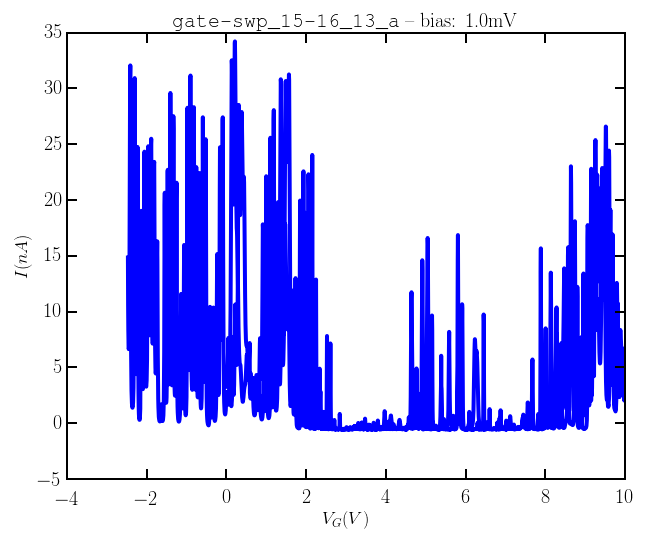

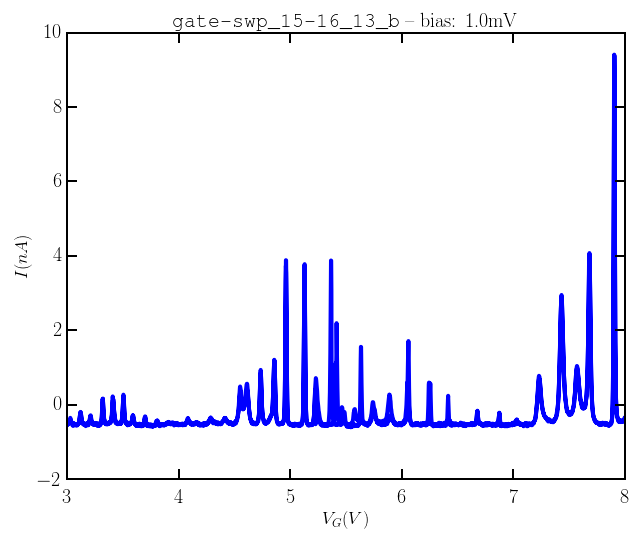

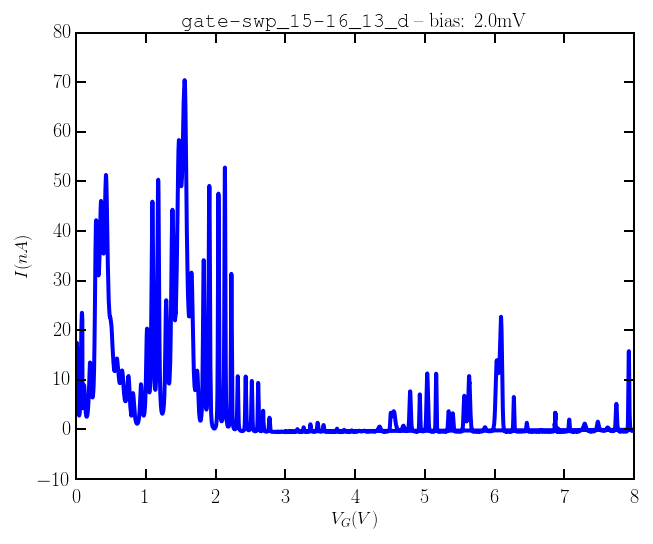

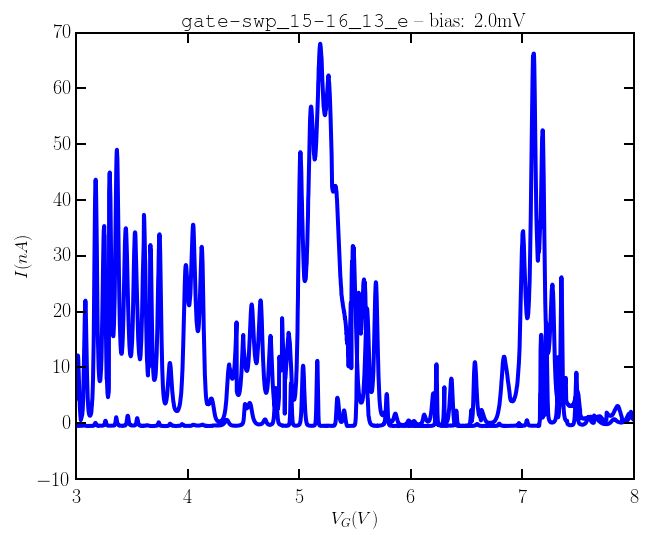

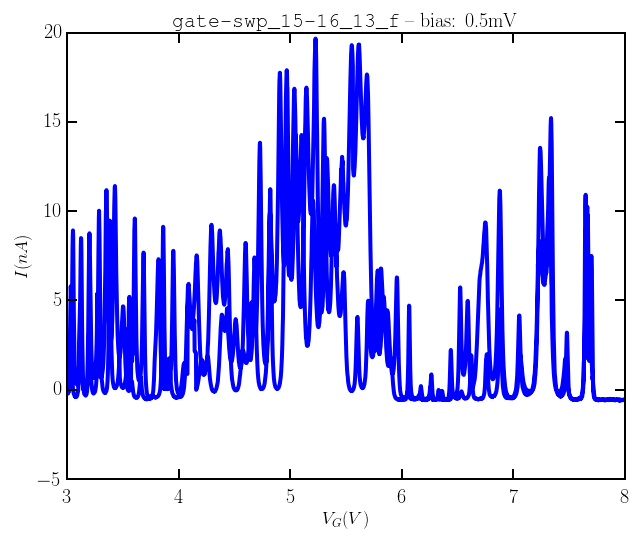

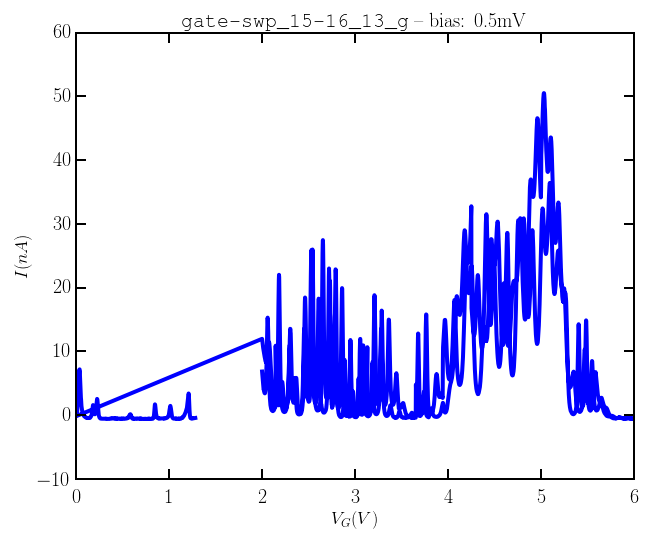

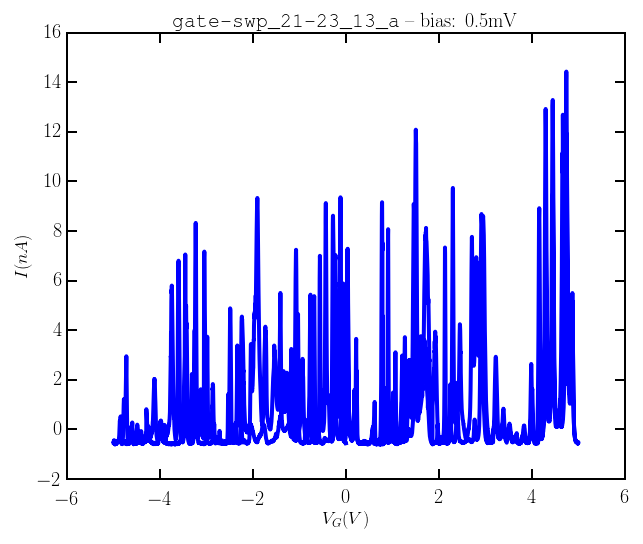

In [84]:
filelist = ['gate-swp_15-16_13_a', 'gate-swp_15-16_13_b', 'gate-swp_15-16_13_d', 
            'gate-swp_15-16_13_e', 'gate-swp_15-16_13_f', 'gate-swp_15-16_13_g',
            'gate-swp_21-23_13_a']
filelist = [os.path.join(cold_dir, f+'.bin') for f in filelist]

for f in filelist:
    bias = get_bias(lvdt.get_txt(f))
    df = lvdt.get_data_2d(f)
    fshort = f.split('/')[-1][:-4]
    fnew = '4K_'+fshort+'_{0:.1f}mV.pkl'.format(1000*bias)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(df['Gate'], df['Iavg']*1e9)
    ax.set_xlabel(r'$V_G (V)$')
    ax.set_ylabel(r'$I (nA)$')
    ax.set_title(r'$\verb|{0}|$ -- bias: {1:.1f}mV'.format(fshort, bias*1000))
    
    df.to_pickle(os.path.join(new_dir, fnew))

/Volumes/JUPITER/Data/SCF75/4K/VI-gate_21-23_13_a.bin
/Volumes/JUPITER/Data/SCF75/4K/VI-gate_15-16_13_b.bin
/Volumes/JUPITER/Data/SCF75/4K/VI-gate_21-23_13_b_n1T.bin
/Volumes/JUPITER/Data/SCF75/4K/VI-gate_21-23_13_b_p1T.bin
/Volumes/JUPITER/Data/SCF75/4K/VI-gate_15-16_13_e.bin
/Volumes/JUPITER/Data/SCF75/4K/VI-gate_15-16_13_f.bin


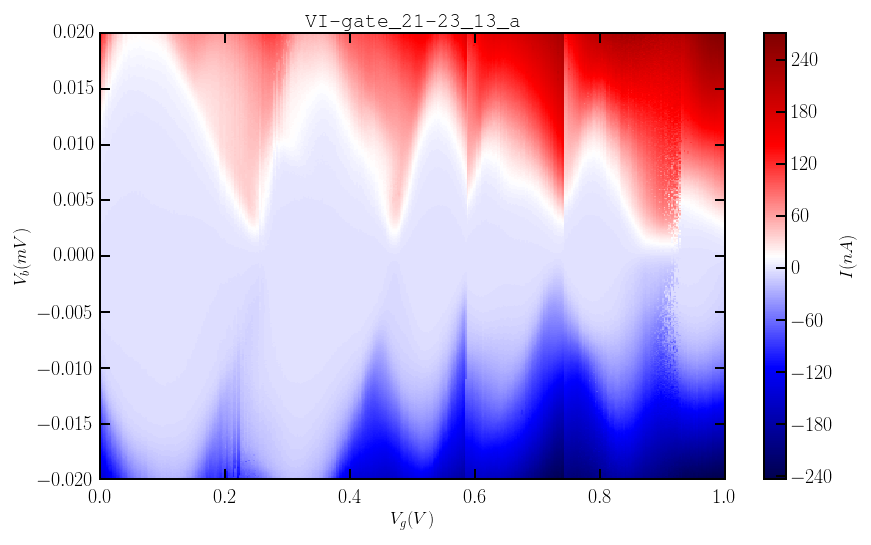

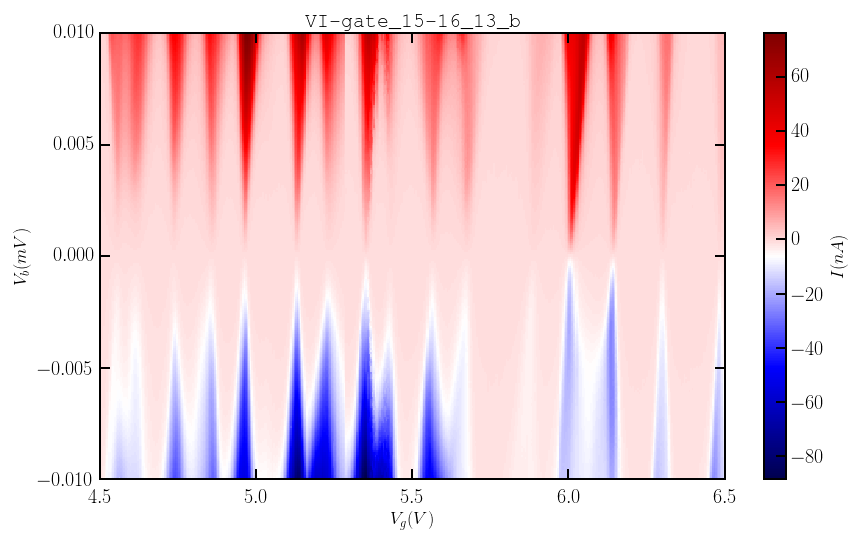

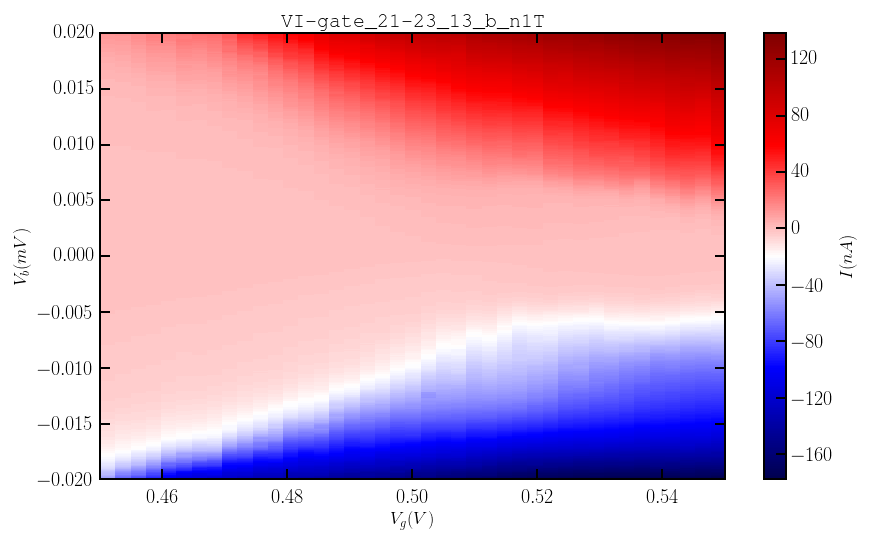

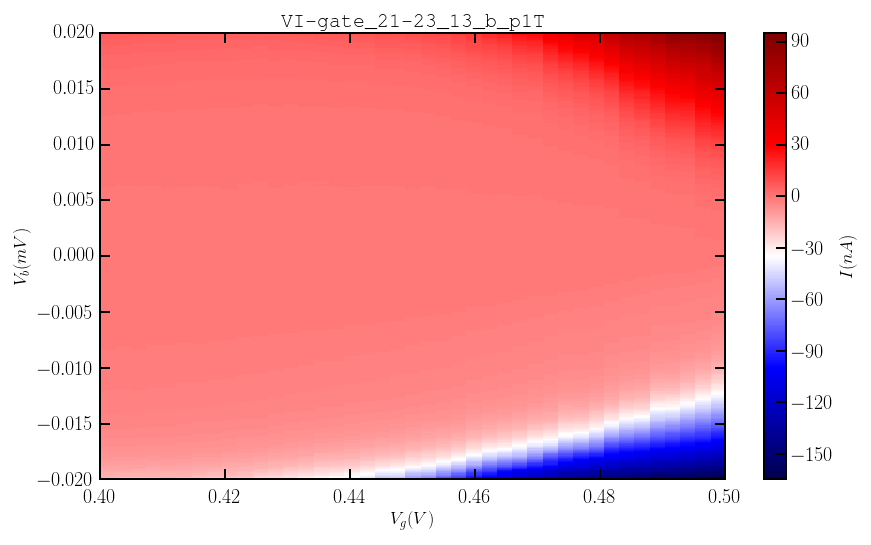

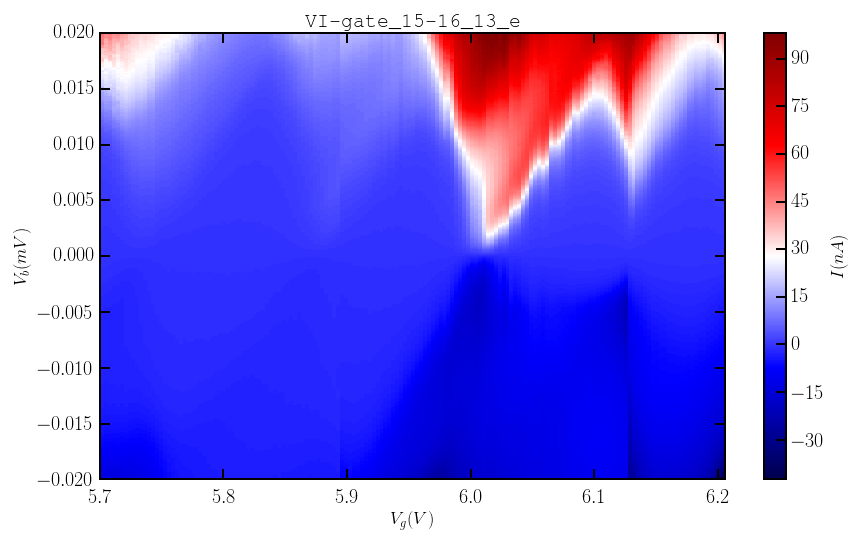

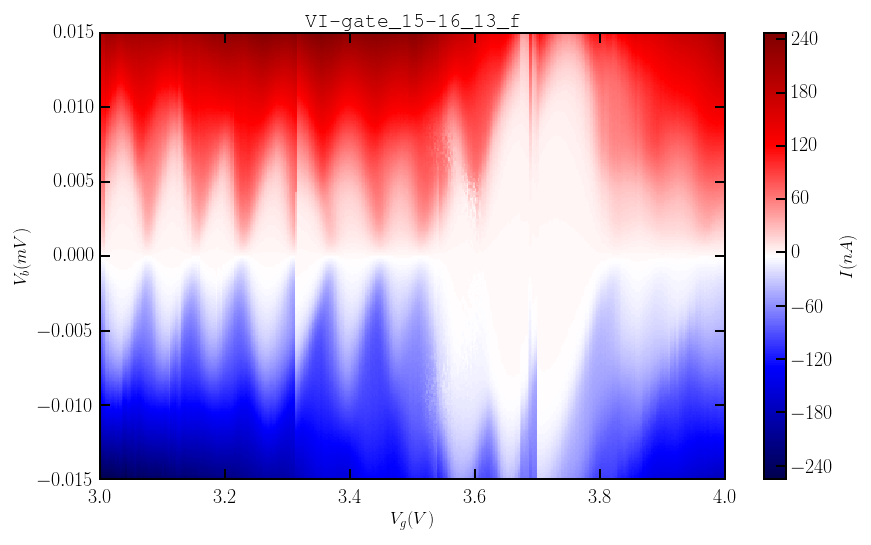

In [86]:
filelist = [
'VI-gate_21-23_13_a.bin',
'VI-gate_15-16_13_b.bin', 
'VI-gate_21-23_13_b_n1T.bin', 
'VI-gate_21-23_13_b_p1T.bin', 
'VI-gate_15-16_13_e.bin', 
'VI-gate_15-16_13_f.bin']
filelist = [os.path.join(cold_dir, f) for f in filelist]

for f in filelist:
    print f
    if os.path.isfile(f):
        try:
            fshort = f.split('/')[-1][:-4]
            fnew = '4K_'+fshort+'.pkl'
            
            df = lvdt.get_data_3d(f)
            df = df.groupby(df.index).mean()

            fig = plt.figure(figsize=(14,8))
            ax = fig.add_subplot(1,1,1)
            limits = lvdt.df_extent(df)
            im = ax.imshow(df*1e9, extent = limits, 
                           cmap = plt.cm.seismic,
                           origin = 'lower', aspect = 'auto', interpolation = 'nearest')
            ax.set_xlabel(r'$V_g (V)$')
            ax.set_ylabel(r'$V_b (mV)$')
            ax.set_title(r'$\verb|{0}|$'.format(fshort))
            cb = plt.colorbar(im)
            cb.set_label(r'$I (nA)$')
            
            df.to_pickle(os.path.join(new_dir, fnew))
        except ValueError, msg:
            print msg
        except IndexError, msg:
            print msg

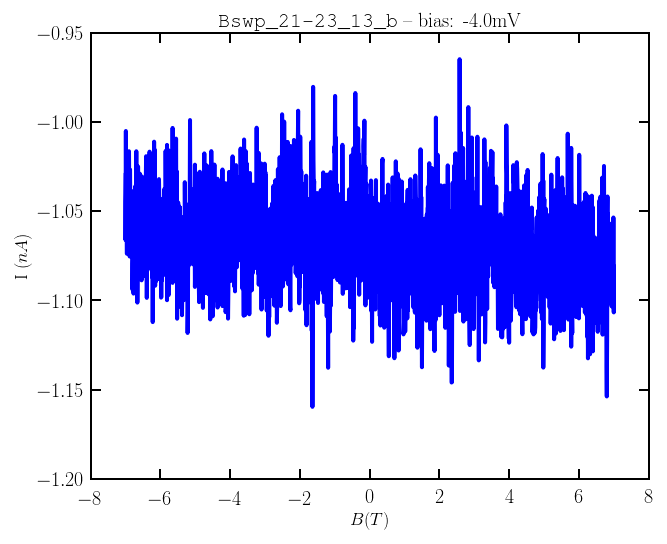

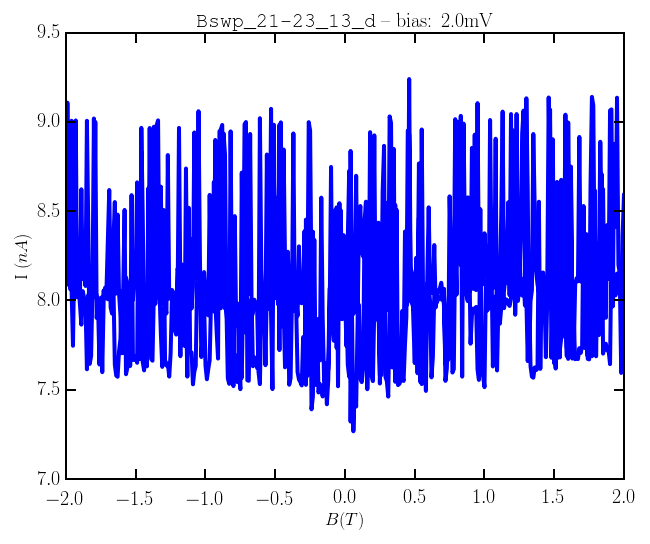

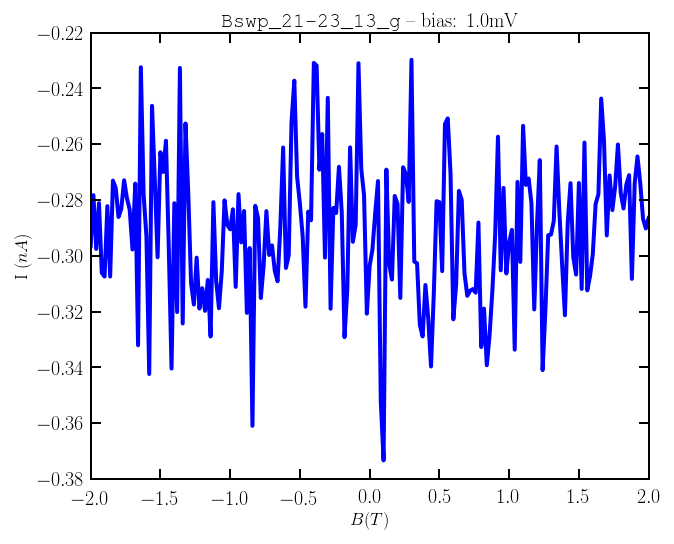

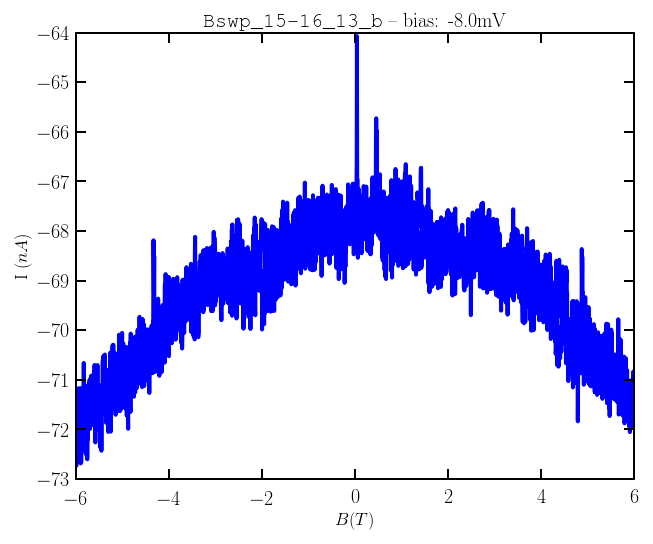

In [91]:
filelist = [
'Bswp_21-23_13_b.bin',
'Bswp_21-23_13_d.bin',
'Bswp_21-23_13_g.bin', 
'Bswp_15-16_13_b.bin'] 
filelist = [os.path.join(cold_dir, f) for f in filelist]

for f in filelist:
    if os.path.isfile(f):
        try:
            fshort = f.split('/')[-1][:-4]
            bias = get_bias(lvdt.get_txt(f))
            fnew = '4K_'+fshort+'_{0:.1f}mV.pkl'.format(1000*bias)
            df = lvdt.get_data_2d(f)

            fig = plt.figure()
            ax = fig.add_subplot(1,1,1)
            ax.plot(df['Field'], df['Iavg']*1e9)
            ax.set_xlabel(r'$B (T)$')
            ax.set_ylabel(r'I $(nA)$')
            ax.set_title(r'$\verb|{0}|$ -- bias: {1:.1f}mV'.format(fshort, bias*1000))
    
            df.to_pickle(os.path.join(new_dir, fnew))
        except ValueError, msg:
            print msg
        except IndexError, msg:
            print msg
        except KeyError, msg:
            print msg

In [92]:
def get_gate(header):
    bias = 0.0
    gate = 0.0
    for i,line in enumerate(header):
#         if line[0] == 'Bias Output Options':
#             bias = float(header[i+5][1])
        if line[0] == 'Gate Output Options':
            gate = float(header[i+5][1])
    return gate

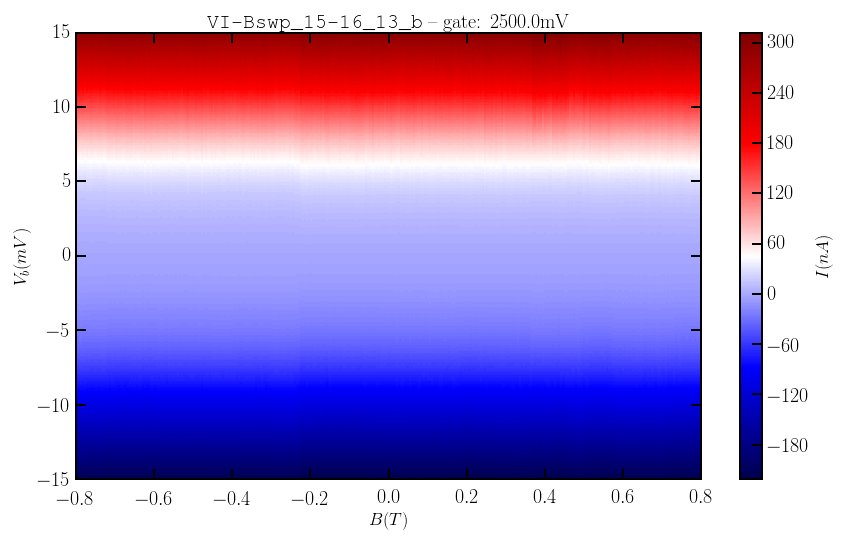

In [94]:
f = os.path.join(cold_dir, 'VI-Bswp_15-16_13_b.bin') # only good one

fshort = f.split('/')[-1][:-4]
gate = get_gate(lvdt.get_txt(f))
fnew = '4K_'+fshort+'_{0:.1f}mV.pkl'.format(1000*gate)

df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(df)
im = ax.imshow(df*1e9, extent = limits, 
               cmap = plt.cm.seismic,
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$B (T)$')
ax.set_ylabel(r'$V_b (mV)$')
ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
cb = plt.colorbar(im)
cb.set_label(r'$I (nA)$')
ax.set_title(r'$\verb|{0}|$ -- gate: {1:.1f}mV'.format(fshort, gate*1000))

df.to_pickle(os.path.join(new_dir, fnew))

# SCF96

In [100]:
cold_dir = '/Volumes/JUPITER/Data/SCF96/q1/'
new_dir = '/Volumes/JUPITER/Data/fm_dots/SCF96/'

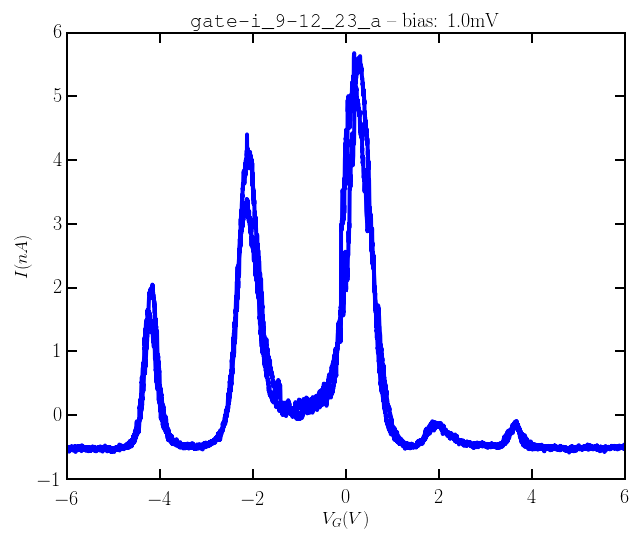

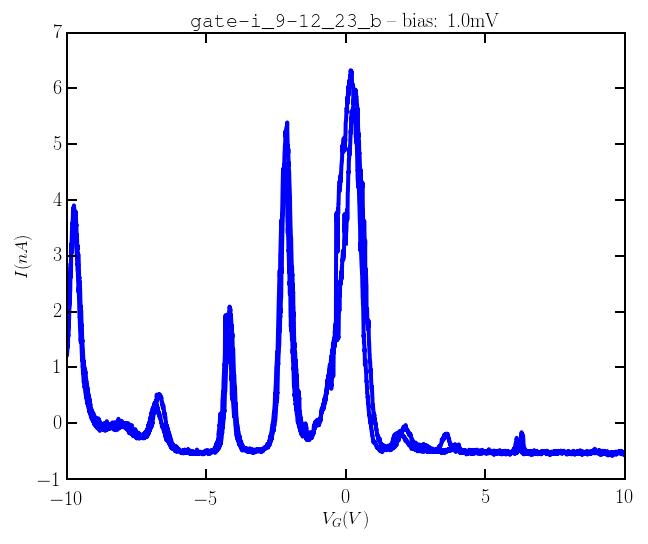

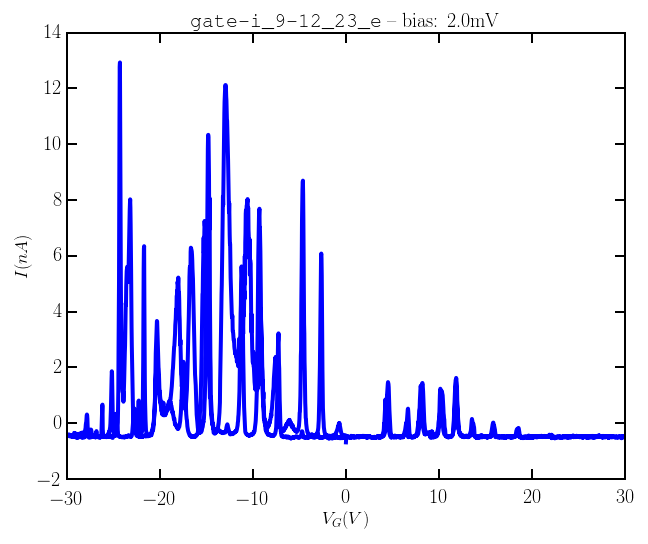

In [101]:
filelist = ['gate-i_9-12_23_a.bin', 'gate-i_9-12_23_b.bin', 'gate-i_9-12_23_e.bin']
filelist = [os.path.join(cold_dir, f) for f in filelist]

for f in filelist:
    bias = get_bias(lvdt.get_txt(f))
    df = lvdt.get_data_2d(f)
    fshort = f.split('/')[-1][:-4]
    fnew = '4K_'+fshort+'_{0:.1f}mV.pkl'.format(1000*bias)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(df['Gate'], df['Iavg']*1e9)
    ax.set_xlabel(r'$V_G (V)$')
    ax.set_ylabel(r'$I (nA)$')
    ax.set_title(r'$\verb|{0}|$ -- bias: {1:.1f}mV'.format(fshort, bias*1000))
    
    df.to_pickle(os.path.join(new_dir, fnew))

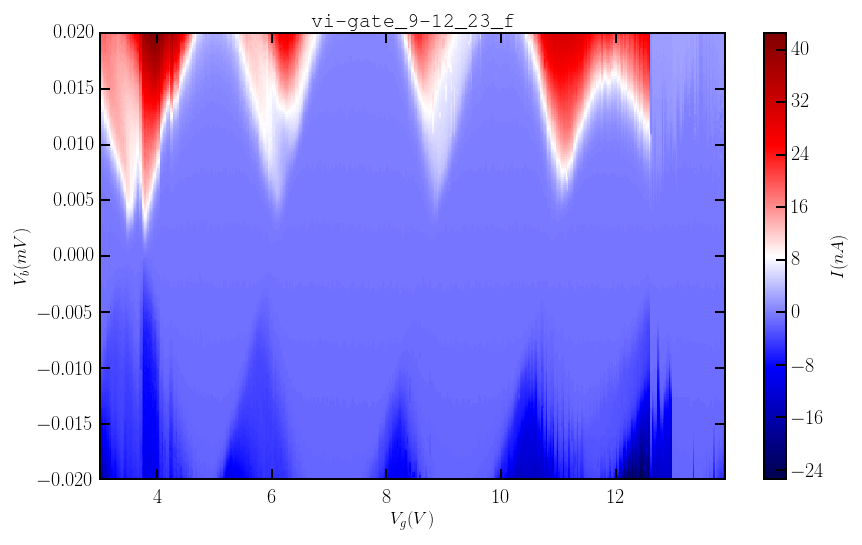

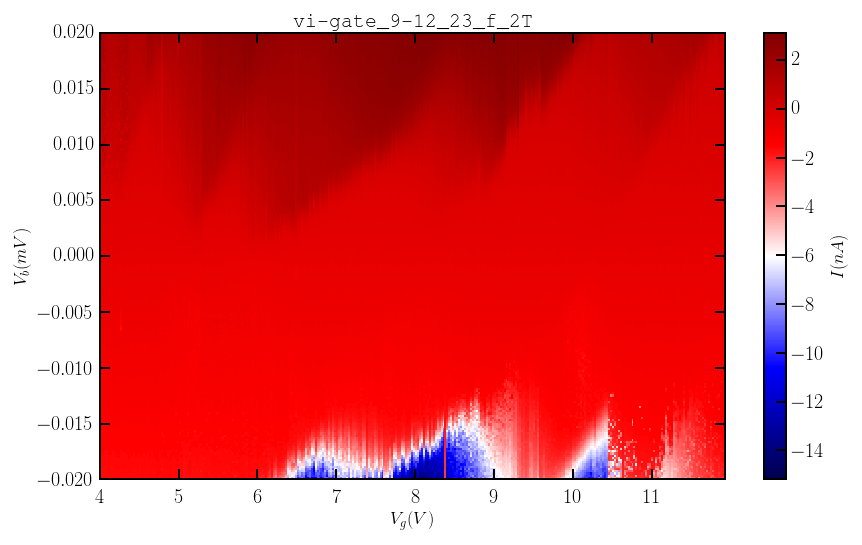

In [102]:
filelist = ['vi-gate_9-12_23_f.bin', 'vi-gate_9-12_23_f_2T.bin']
filelist = [os.path.join(cold_dir, f) for f in filelist]

for f in filelist:
    if os.path.isfile(f):
        try:
            fshort = f.split('/')[-1][:-4]
            fnew = '4K_'+fshort+'.pkl'
            
            df = lvdt.get_data_3d(f)
            df = df.groupby(df.index).mean()

            fig = plt.figure(figsize=(14,8))
            ax = fig.add_subplot(1,1,1)
            limits = lvdt.df_extent(df)
            im = ax.imshow(df*1e9, extent = limits, 
                           cmap = plt.cm.seismic,
                           origin = 'lower', aspect = 'auto', interpolation = 'nearest')
            ax.set_xlabel(r'$V_g (V)$')
            ax.set_ylabel(r'$V_b (mV)$')
            ax.set_title(r'$\verb|{0}|$'.format(fshort))
            cb = plt.colorbar(im)
            cb.set_label(r'$I (nA)$')
            
            df.to_pickle(os.path.join(new_dir, fnew))
        except ValueError, msg:
            print msg
        except IndexError, msg:
            print msg

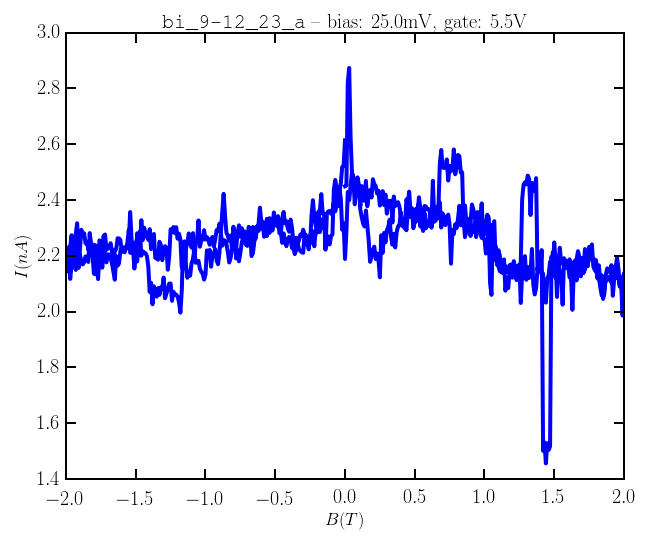

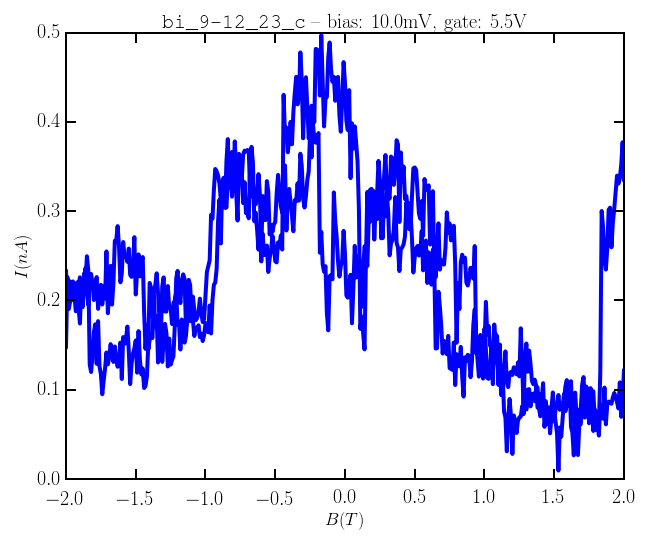

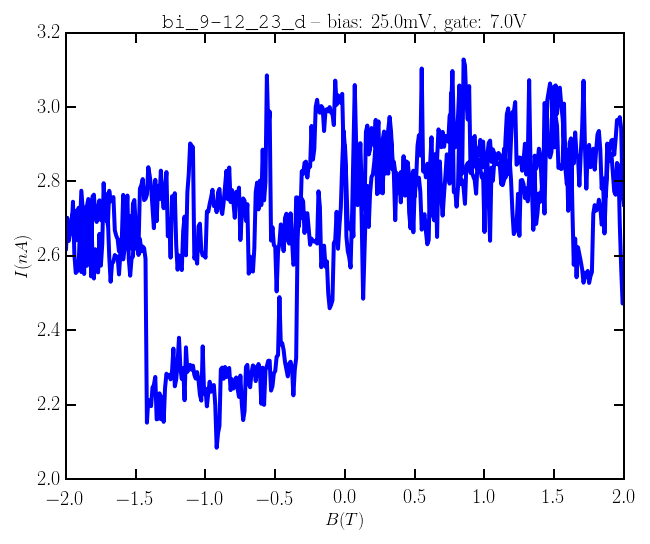

In [103]:
filelist = ['bi_9-12_23_a.bin', 'bi_9-12_23_c.bin', 'bi_9-12_23_d.bin']
filelist = [os.path.join(cold_dir, f) for f in filelist]

for f in filelist:
    bias, gate = get_bias_gate(lvdt.get_txt(f))
    df = lvdt.get_data_2d(f)
    fshort = f.split('/')[-1][:-4]
    fnew = '4K_'+fshort+'_{0:.0f}mV_{1:.0f}mV.pkl'.format(1000*bias, 1000*gate)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(df['Field'], df['Iavg']*1e9)
    ax.set_xlabel(r'$B (T)$')
    ax.set_ylabel(r'$I (nA)$')
    ax.set_title(r'$\verb|{0}|$ -- bias: {1}mV, gate: {2}V'.format(fshort, bias*1000, gate))
    
    df.to_pickle(os.path.join(new_dir, fnew))

In [104]:
cold_dir = '/Volumes/JUPITER/Data/SCF96/q3/'
new_dir = '/Volumes/JUPITER/Data/fm_dots/SCF96/'

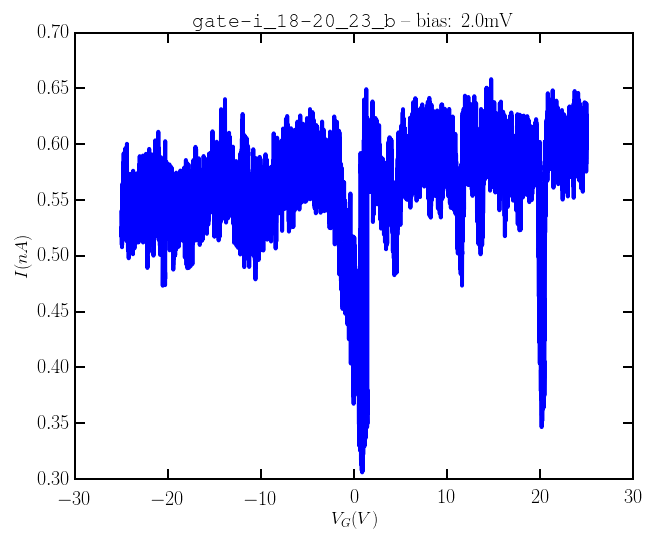

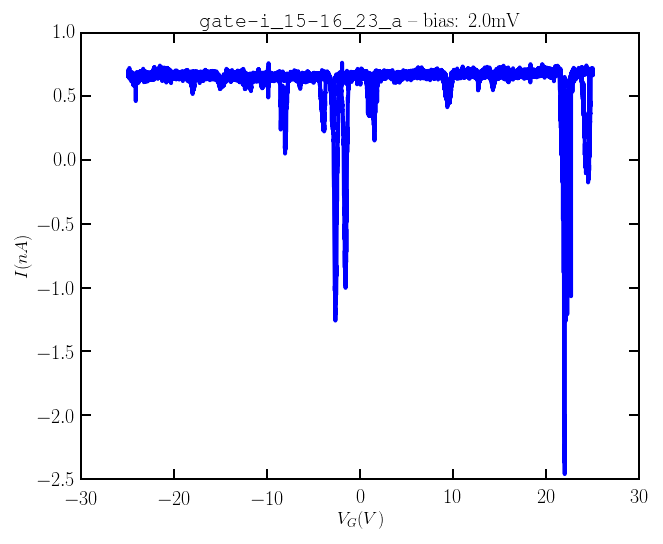

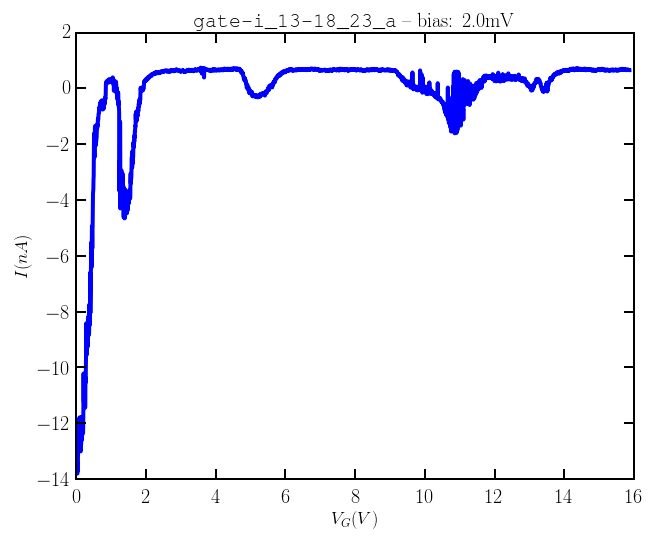

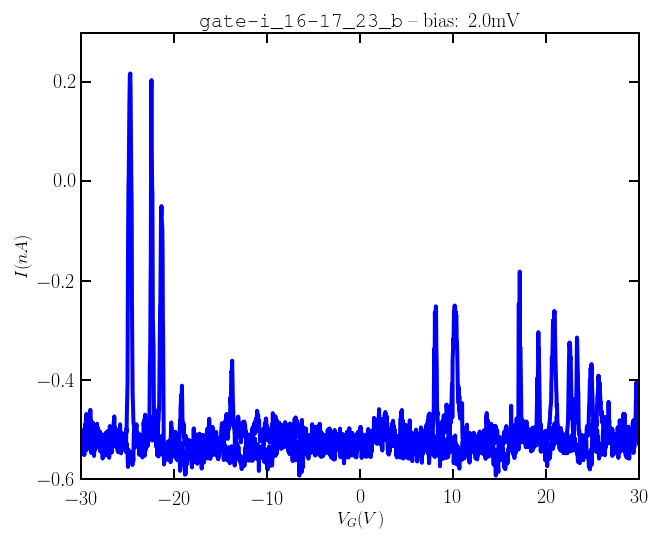

In [105]:
filelist = ['gate-i_18-20_23_b.bin', 'gate-i_15-16_23_a.bin', 'gate-i_13-18_23_a.bin' , 'gate-i_16-17_23_b.bin']
filelist = [os.path.join(cold_dir, f) for f in filelist]

for f in filelist:
    bias = get_bias(lvdt.get_txt(f))
    df = lvdt.get_data_2d(f)
    fshort = f.split('/')[-1][:-4]
    fnew = '4K_'+fshort+'_{0:.1f}mV.pkl'.format(1000*bias)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(df['Gate'], df['Iavg']*1e9)
    ax.set_xlabel(r'$V_G (V)$')
    ax.set_ylabel(r'$I (nA)$')
    ax.set_title(r'$\verb|{0}|$ -- bias: {1:.1f}mV'.format(fshort, bias*1000))
    
    df.to_pickle(os.path.join(new_dir, fnew))


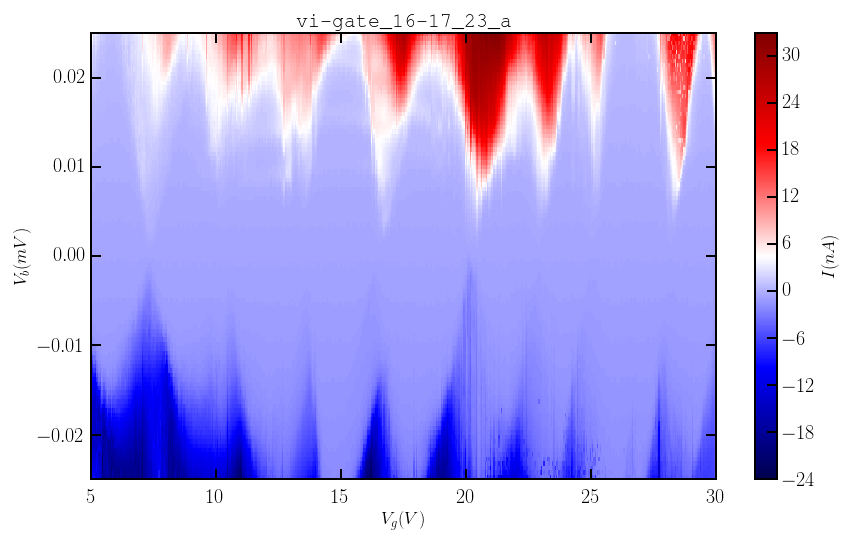

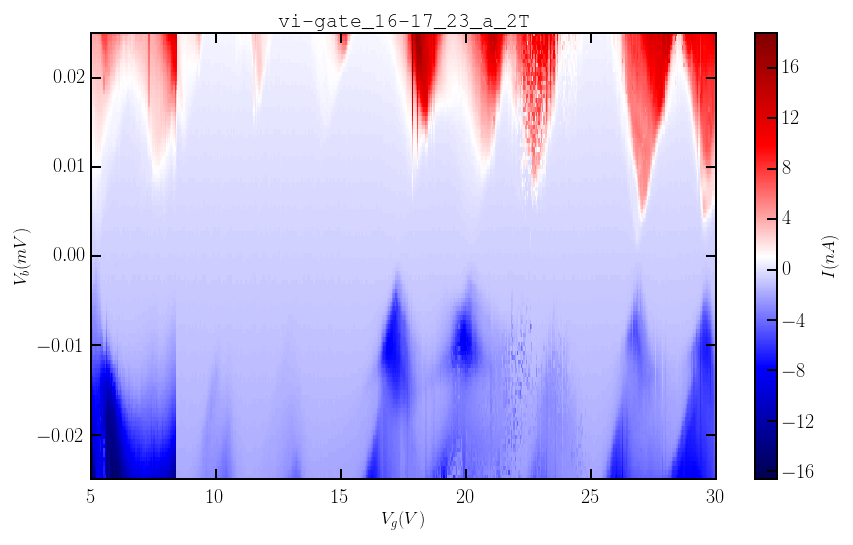

In [106]:
filelist = ['vi-gate_16-17_23_a.bin', 'vi-gate_16-17_23_a_2T.bin']
filelist = [os.path.join(cold_dir, f) for f in filelist]

for f in filelist:
    if os.path.isfile(f):
        try:
            fshort = f.split('/')[-1][:-4]
            fnew = '4K_'+fshort+'.pkl'
            
            df = lvdt.get_data_3d(f)
            df = df.groupby(df.index).mean()

            fig = plt.figure(figsize=(14,8))
            ax = fig.add_subplot(1,1,1)
            limits = lvdt.df_extent(df)
            im = ax.imshow(df*1e9, extent = limits, 
                           cmap = plt.cm.seismic,
                           origin = 'lower', aspect = 'auto', interpolation = 'nearest')
            ax.set_xlabel(r'$V_g (V)$')
            ax.set_ylabel(r'$V_b (mV)$')
            ax.set_title(r'$\verb|{0}|$'.format(fshort))
            cb = plt.colorbar(im)
            cb.set_label(r'$I (nA)$')
            
            df.to_pickle(os.path.join(new_dir, fnew))
        except ValueError, msg:
            print msg
        except IndexError, msg:
            print msg

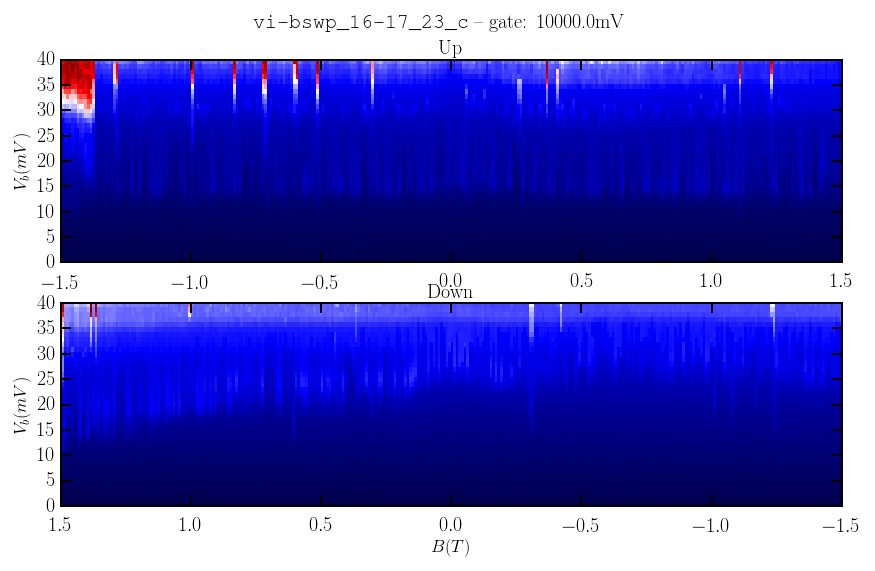

In [108]:
f = os.path.join(cold_dir, 'vi-bswp_16-17_23_c.bin')

fshort = f.split('/')[-1][:-4]
gate = get_gate(lvdt.get_txt(f))
fnew = '4K_'+fshort+'_{0:.1f}mV.pkl'.format(1000*gate)

df = lvdt.get_data_3d(f)
ind = np.where(np.diff(df.columns)==0)[0]
cuts = np.concatenate(([0],ind,[len(df.columns)-1]), axis=0)
df = df.groupby(df.index).mean()
df.index = df.index*1000

fig, ax = plt.subplots(2,1, figsize=(14,8))

limits = [df.columns[cuts[0]], df.columns[cuts[1]], df.index.min(), df.index.max()]
im0 = ax[0].imshow(df.iloc[:,cuts[0]:cuts[1]]*1e9, extent = limits, 
               cmap = plt.cm.seismic,
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
#ax[0].set_xlabel(r'$V_g (V)$')
ax[0].set_ylabel(r'$V_b (mV)$')
ax[0].set_title('Up')
#cb0 = plt.colorbar(im0)
#cb0.set_label(r'$I (nA)$')

limits = [df.columns[cuts[1]], df.columns[cuts[-1]], df.index.min(), df.index.max()]
im1 = ax[1].imshow(df.iloc[:,cuts[1]:cuts[-1]]*1e9, extent = limits, 
               cmap = plt.cm.seismic,
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
#ax[0].set_xlabel(r'$V_g (V)$')
ax[1].set_ylabel(r'$V_b (mV)$')
ax[1].set_xlabel(r'$B (T)$')
ax[1].set_title('Down')
fig.suptitle(r'$\verb|{0}|$ -- gate: {1:.1f}mV'.format(fshort, gate*1000))

df.to_pickle(os.path.join(new_dir, fnew))

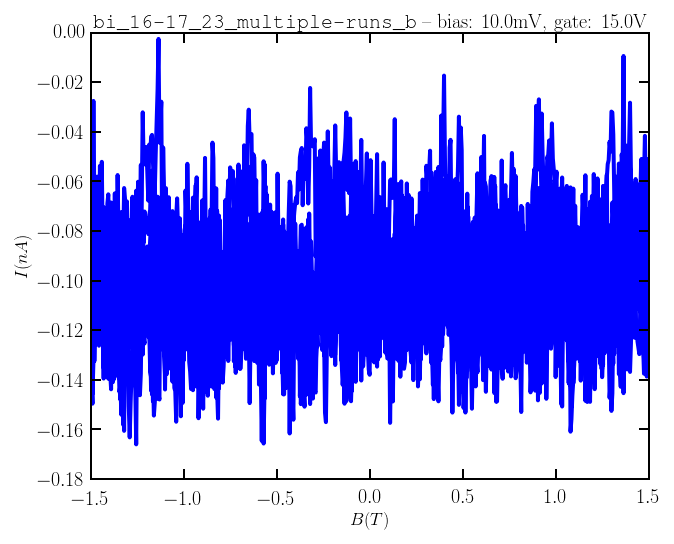

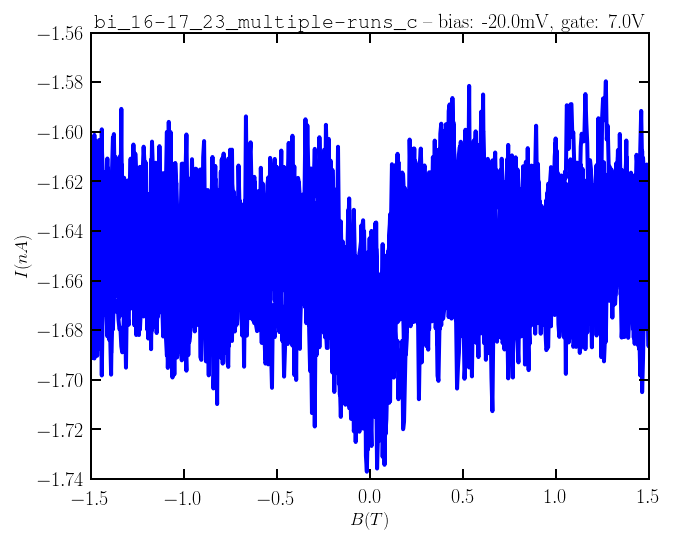

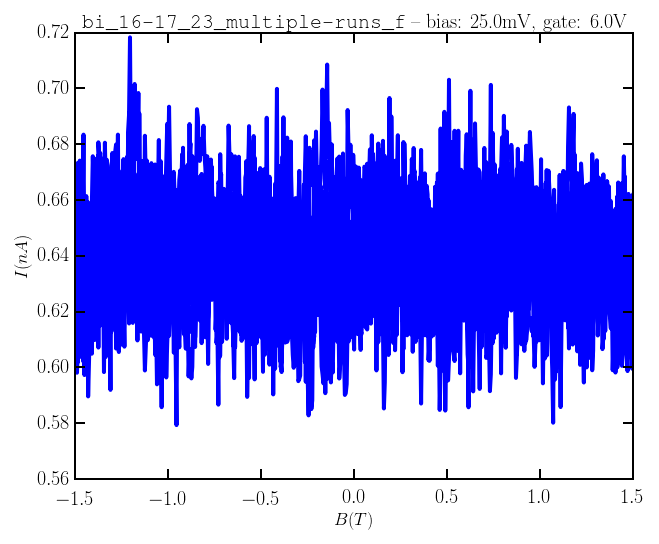

In [109]:
filelist = ['bi_16-17_23_multiple-runs_b.bin', 'bi_16-17_23_multiple-runs_c.bin', 'bi_16-17_23_multiple-runs_f.bin']
filelist = [os.path.join(cold_dir, f) for f in filelist]

for f in filelist:
    bias, gate = get_bias_gate(lvdt.get_txt(f))
    df = lvdt.get_data_2d(f)
    fshort = f.split('/')[-1][:-4]
    fnew = '4K_'+fshort+'_{0:.0f}mV_{1:.0f}mV.pkl'.format(1000*bias, 1000*gate)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(df['Field'], df['Iavg']*1e9)
    ax.set_xlabel(r'$B (T)$')
    ax.set_ylabel(r'$I (nA)$')
    ax.set_title(r'$\verb|{0}|$ -- bias: {1}mV, gate: {2}V'.format(fshort, bias*1000, gate))
    
    df.to_pickle(os.path.join(new_dir, fnew))

# SCF98

In [120]:
cold_dir = '/Volumes/JUPITER/Data/SCF98/q2/500mK/'
new_dir = '/Volumes/JUPITER/Data/fm_dots/SCF98/'

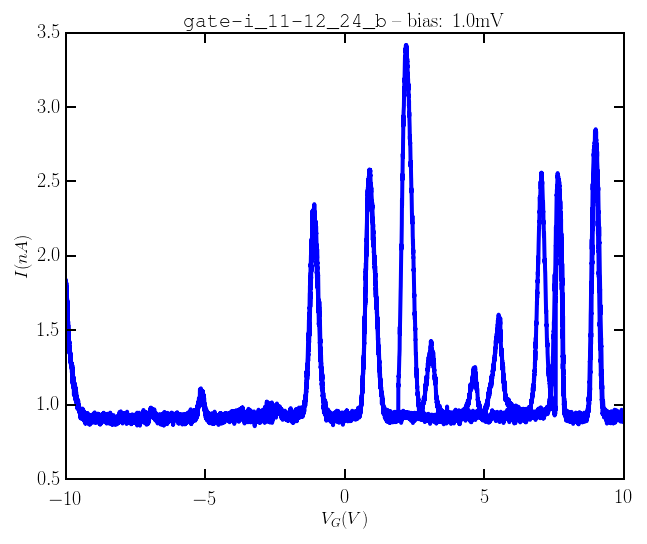

In [121]:
f = os.path.join(cold_dir, 'gate-i_11-12_24_b.bin')
bias = get_bias(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
fshort = f.split('/')[-1][:-4]
fnew = '500mK_'+fshort+'_{0:.1f}mV.pkl'.format(1000*bias)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df['Gate'], df['Iavg']*1e9)
ax.set_xlabel(r'$V_G (V)$')
ax.set_ylabel(r'$I (nA)$')
ax.set_title(r'$\verb|{0}|$ -- bias: {1:.1f}mV'.format(fshort, bias*1000))

df.to_pickle(os.path.join(new_dir, fnew))

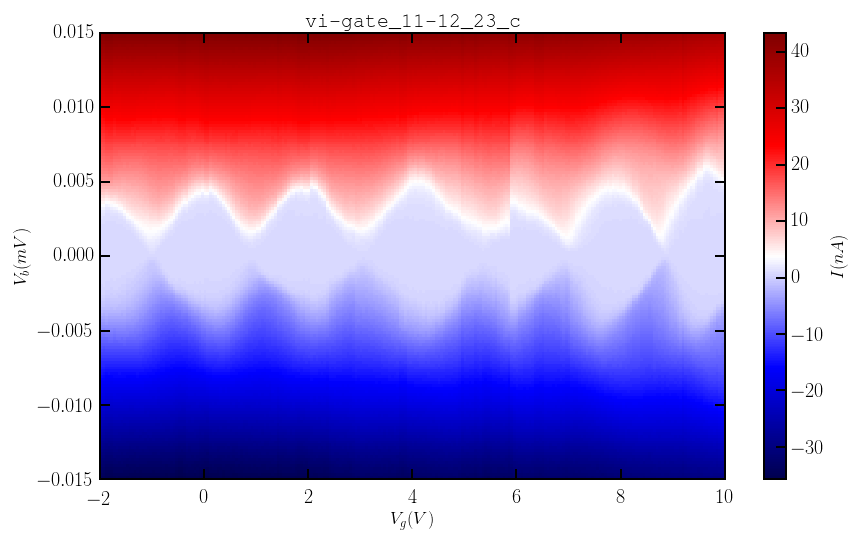

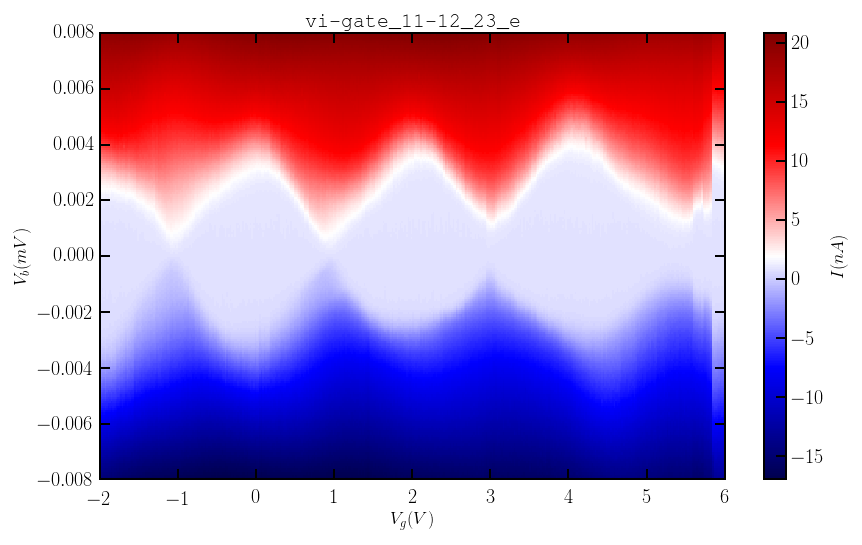

In [122]:
filelist = ['vi-gate_11-12_23_c.bin', 'vi-gate_11-12_23_e.bin']
filelist = [os.path.join(cold_dir, f) for f in filelist]

for f in filelist:
    if os.path.isfile(f):
        try:
            fshort = f.split('/')[-1][:-4]
            fnew = '500mK_'+fshort+'.pkl'
            
            df = lvdt.get_data_3d(f)
            df = df.groupby(df.index).mean()

            fig = plt.figure(figsize=(14,8))
            ax = fig.add_subplot(1,1,1)
            limits = lvdt.df_extent(df)
            im = ax.imshow(df*1e9, extent = limits, 
                           cmap = plt.cm.seismic,
                           origin = 'lower', aspect = 'auto', interpolation = 'nearest')
            ax.set_xlabel(r'$V_g (V)$')
            ax.set_ylabel(r'$V_b (mV)$')
            ax.set_title(r'$\verb|{0}|$'.format(fshort))
            cb = plt.colorbar(im)
            cb.set_label(r'$I (nA)$')
            
            df.to_pickle(os.path.join(new_dir, fnew))
        except ValueError, msg:
            print msg
        except IndexError, msg:
            print msg

In [123]:
cold_dir = '/Volumes/JUPITER/Data/SCF98/q2/150mK/'
new_dir = '/Volumes/JUPITER/Data/fm_dots/SCF98/'

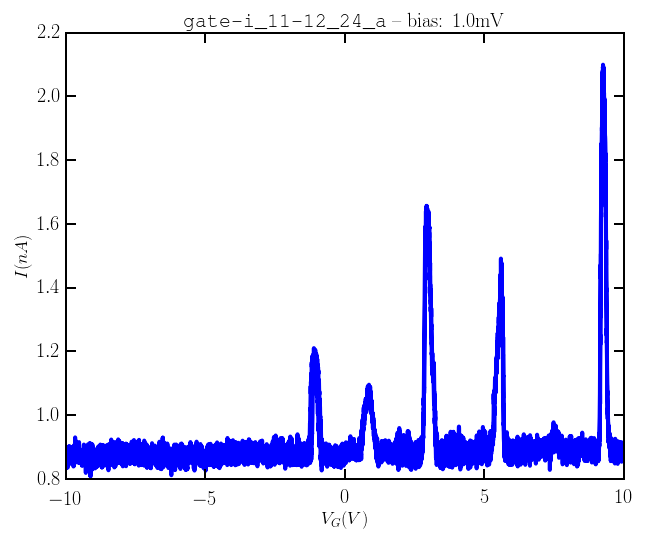

In [124]:
f = os.path.join(cold_dir, 'gate-i_11-12_24_a.bin')
bias = get_bias(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
fshort = f.split('/')[-1][:-4]
fnew = '150mK_'+fshort+'_{0:.1f}mV.pkl'.format(1000*bias)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df['Gate'], df['Iavg']*1e9)
ax.set_xlabel(r'$V_G (V)$')
ax.set_ylabel(r'$I (nA)$')
ax.set_title(r'$\verb|{0}|$ -- bias: {1:.1f}mV'.format(fshort, bias*1000))

df.to_pickle(os.path.join(new_dir, fnew))

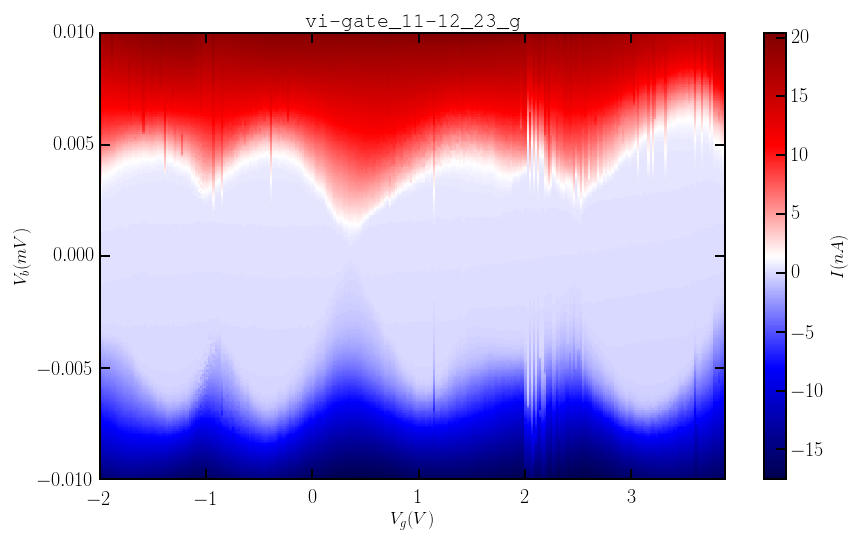

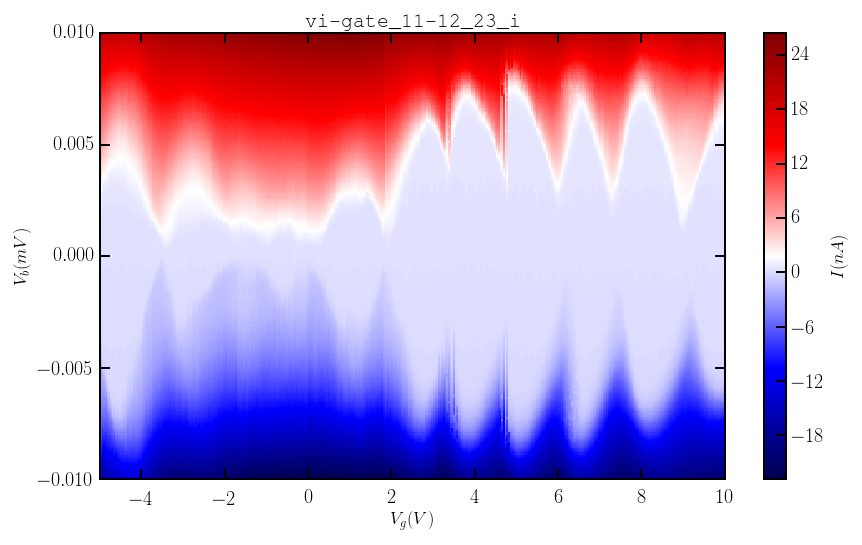

In [126]:
filelist = ['vi-gate_11-12_23_g.bin', 'vi-gate_11-12_23_i.bin']
filelist = [os.path.join(cold_dir, f) for f in filelist]

for f in filelist:
    if os.path.isfile(f):
        try:
            fshort = f.split('/')[-1][:-4]
            fnew = '150mK_'+fshort+'.pkl'
            
            df = lvdt.get_data_3d(f)
            df = df.groupby(df.index).mean()

            fig = plt.figure(figsize=(14,8))
            ax = fig.add_subplot(1,1,1)
            limits = lvdt.df_extent(df)
            im = ax.imshow(df*1e9, extent = limits, 
                           cmap = plt.cm.seismic,
                           origin = 'lower', aspect = 'auto', interpolation = 'nearest')
            ax.set_xlabel(r'$V_g (V)$')
            ax.set_ylabel(r'$V_b (mV)$')
            ax.set_title(r'$\verb|{0}|$'.format(fshort))
            cb = plt.colorbar(im)
            cb.set_label(r'$I (nA)$')
            
            df.to_pickle(os.path.join(new_dir, fnew))
        except ValueError, msg:
            print msg
        except IndexError, msg:
            print msg

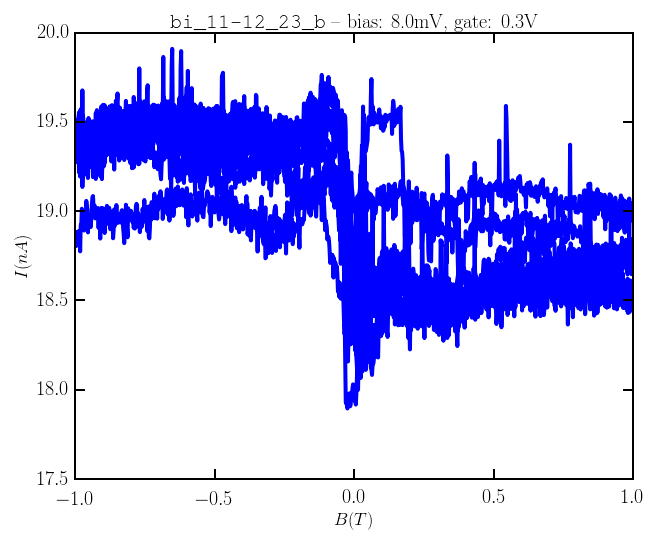

In [128]:
f = os.path.join(cold_dir, 'bi_11-12_23_b.bin')
bias, gate = get_bias_gate(lvdt.get_txt(f))
df = lvdt.get_data_2d(f)
fshort = f.split('/')[-1][:-4]
fnew = '150mK_'+fshort+'_{0:.0f}mV_{1:.0f}mV.pkl'.format(1000*bias, 1000*gate)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df['Field'], df['Iavg']*1e9)
ax.set_xlabel(r'$B (T)$')
ax.set_ylabel(r'$I (nA)$')
ax.set_title(r'$\verb|{0}|$ -- bias: {1}mV, gate: {2}V'.format(fshort, bias*1000, gate))

df.to_pickle(os.path.join(new_dir, fnew))